# Scratch Linear Regression vs Sk-learn Linear Regression with Random Data

In this notebook I will test the linear regression algorithm I made from scratch vs the Sk-learn Linear Regression, the notebook has the following sections:
1. Create the Random Data
2. Create my LR Model
3. Creathe the Sk-learn LR model
5. Compare the results

In [1]:
# My Linear Regression Model
from linear_regression import myLinearRegression
# Utilities from Sk-learn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
# Numpy for math computations
import numpy as np
np.set_printoptions(precision=5)
# Print like tabular data
from tabulate import tabulate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Create the Random Data
- **X**: a matrix of 100 instances of 3 features
- **weigths**: the "real" weights that represents the linear relationship between **X** and **y**
- **y**: a vector of 100 elements 

In [2]:
n_features = 3

np.random.seed(42)
X = np.random.randn(100, n_features)
weights = np.array([5, -2.0, 3.0])

intercept = np.random.randn() 
noise = np.random.randn(100) * 0.1  # Noise with std of 0.1
y = np.dot(X, weights) + intercept + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

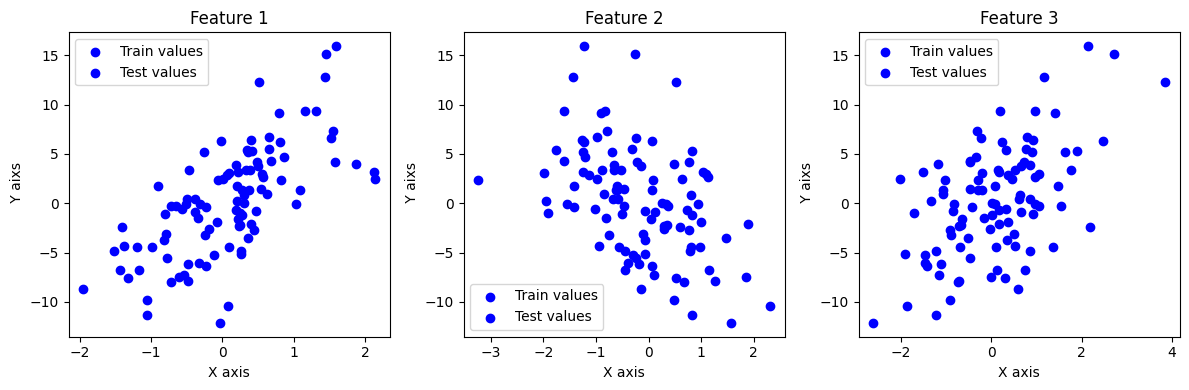

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs = axs.ravel()

# Create 5 plots, one for each feature in X
for i in range(n_features):
    axs[i].scatter(X_train[:, i], y_train, c='blue', label='Train values')
    axs[i].scatter(X_test[:, i], y_test, c='blue', label='Test values')
    
    axs[i].legend()
    axs[i].set_title(f'Feature {i+1}')
    axs[i].set_xlabel('X axis')
    axs[i].set_ylabel(' Y aixs')

plt.tight_layout()
plt.show()

## 2. Create my LR model and fit it

In [4]:
model = myLinearRegression()
model.fit(X_train, y_train)

Converged at epoch 531


In [5]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [6]:
weights_table = {
    'Weight': [f'w{i+1}' for i in range(len(weights))],
    'Real weights': weights, 
    'Learned Weights': model.weights,
    'Absolute difference': np.abs(weights - model.weights.reshape(-1))
    }

print(tabulate(
    weights_table, 
    headers=['Weight', 'Real weights', 'Learned Weights', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭──────────┬────────────────┬───────────────────┬───────────────────────╮
│ Weight   │   Real weights │   Learned Weights │   Absolute Difference │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w1       │              5 │           4.99653 │            0.00347275 │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w2       │             -2 │          -1.99441 │            0.00558847 │
├──────────┼────────────────┼───────────────────┼───────────────────────┤
│ w3       │              3 │           2.9913  │            0.00870458 │
╰──────────┴────────────────┴───────────────────┴───────────────────────╯


In [7]:
print(f'The intercept is: {model.intercept:.4f}')
print(f'The Mse is {mse:.4f}')

The intercept is: -0.8187
The Mse is 0.0098


###  Create the Sk-learn LR model 

In [8]:
from sklearn.linear_model import SGDRegressor

sklearn_model = SGDRegressor()
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)
sk_mse = mean_squared_error(y_test, y_pred)

## Compare both models

In [9]:
weights_table = {
    'Weight': [f'w{i+1}' for i in range(len(weights))],
    'myModel weights': model.weights, 
    'Sk-learn weights': sklearn_model.coef_,
    'Absolute difference': np.abs(weights - sklearn_model.coef_)
    }

print(tabulate(
    weights_table, 
    headers=['Weight', 'myModel weights', 'Sk-learn Weights', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭──────────┬───────────────────┬────────────────────┬───────────────────────╮
│ Weight   │   myModel weights │   Sk-learn Weights │   Absolute Difference │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w1       │           4.99653 │            4.91299 │             0.0870116 │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w2       │          -1.99441 │           -1.97069 │             0.0293131 │
├──────────┼───────────────────┼────────────────────┼───────────────────────┤
│ w3       │           2.9913  │            2.96866 │             0.0313396 │
╰──────────┴───────────────────┴────────────────────┴───────────────────────╯


In [10]:
print(tabulate(
    [[model.intercept, sklearn_model.intercept_, abs(model.intercept - sklearn_model.intercept_)]], 
    headers=['myModel intercept', 'Sk-learn intercept', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭─────────────────────┬──────────────────────┬───────────────────────╮
│   myModel intercept │   Sk-learn intercept │   Absolute Difference │
├─────────────────────┼──────────────────────┼───────────────────────┤
│            -0.81866 │             -0.77777 │               0.04089 │
╰─────────────────────┴──────────────────────┴───────────────────────╯


In [11]:
print(tabulate(
    [[mse, sk_mse, abs(mse - sk_mse)]], 
    headers=['myModel MSE', 'Sk-learn MSE', 'Absolute Difference'], 
    tablefmt="rounded_grid")
    )

╭───────────────┬────────────────┬───────────────────────╮
│   myModel MSE │   Sk-learn MSE │   Absolute Difference │
├───────────────┼────────────────┼───────────────────────┤
│    0.00976347 │      0.0142278 │            0.00446433 │
╰───────────────┴────────────────┴───────────────────────╯


## Plot the Linear Regression with the Scratch Model

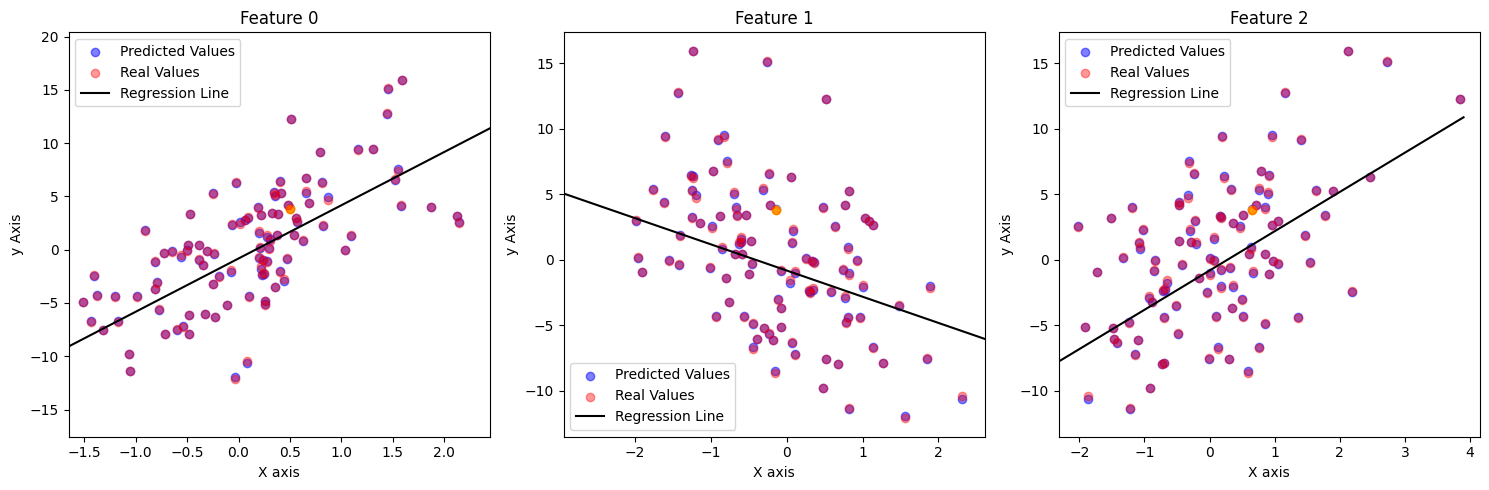

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

y_pred = model.predict(X)
data = np.arange(-3, 4, 0.1)


for i in range(n_features):
    axs[i].scatter(X[:, i], y_pred, color='blue', label='Predicted Values', alpha=0.5)
    axs[i].scatter(X[0, i], y[0], color='yellow')
    axs[i].scatter(X[:, i], y, color='red', label='Real Values', alpha=0.4)
    axs[i].plot(data, (weights[i] * data + intercept), color='black', label="Regression Line")
    
    # Set the title and legends
    axs[i].legend()
    axs[i].set_title(f'Feature {i}')
    axs[i].set_xlabel('X axis')
    axs[i].set_ylabel('y Axis')
    
    # Adjust the limits
    axs[i].set_xlim(min(X[:, i]) + 0.3, max(X[:, i]) + 0.3)
    
plt.tight_layout()
plt.show()

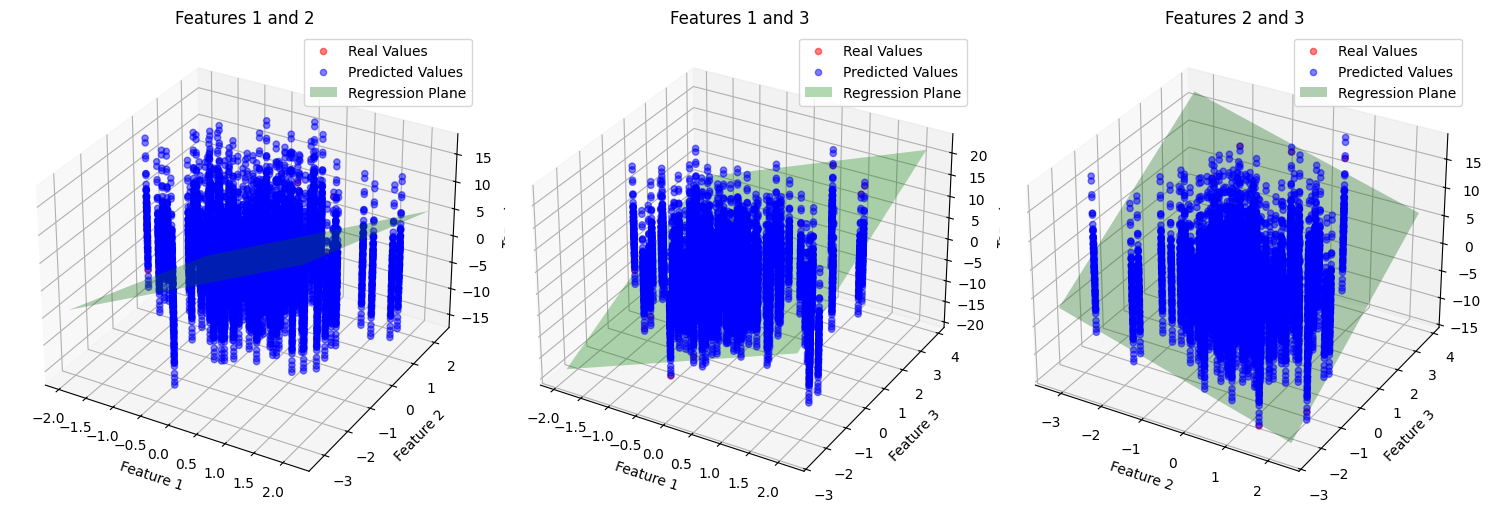

In [13]:
combinations = [(0, 1), (0, 2), (1, 2)]
fig = plt.figure(figsize=(15, 5))

for i, (f1, f2) in enumerate(combinations):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(X[:, f1], X[:, f2], y, color='red', label='Real Values', alpha=0.5)
    ax.scatter(X[:, f1], X[:, f2], y_pred, color='blue', label='Predicted Values', alpha=0.5)
    
    # Grid
    data_f1 = np.linspace(min(X[:, f1]), max(X[:, f1]), 100)
    data_f2 = np.linspace(min(X[:, f2]), max(X[:, f2]), 100)
    data_f1, data_f2 = np.meshgrid(data_f1, data_f2)
    
    # Hyperplane
    hyperplane = weights[f1] * data_f1 + weights[f2] * data_f2 + intercept
    
    # Graficar el hiperplano
    ax.plot_surface(data_f1, data_f2, hyperplane, color='green', alpha=0.3, rstride=100, cstride=100, label="Regression Plane")
    
    # Adjust the plot
    ax.set_title(f'Features {f1+1} and {f2+1}')
    ax.set_xlabel(f'Feature {f1+1}')
    ax.set_ylabel(f'Feature {f2+1}')
    ax.set_zlabel('Target')
    ax.legend()

plt.tight_layout()
plt.show()
